# Project : Fake News Detection

### Step: 1 Importing necessary Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import re
import string
import sklearn

### Step: 2 Importing the datasets

In [ ]:
fake_data = pd.read_csv("Fake.csv")
fake_data.head()

NameError: name 'pd' is not defined

In [ ]:
true_data = pd.read_csv("True.csv")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.shape

(23481, 4)

In [ ]:
true_data.shape

(21417, 4)

### Step: 3 Add labels  

In [ ]:
fake_data["label"] = 1
true_data["label"] = 0

### Step: 4 Convert 'date' to datetime format

In [7]:
fake_data["date"] = pd.to_datetime(fake_data["date"], errors="coerce")
true_data["date"] = pd.to_datetime(true_data["date"], errors="coerce")

### Step: 5 Remove duplicates

In [ ]:
fake_data = fake_data.drop_duplicates()
true_data = true_data.drop_duplicates()

### Step: 6 Clean text

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

fake_data["title"] = fake_data["title"].apply(clean_text)
fake_data["text"] = fake_data["text"].apply(clean_text)
true_data["title"] = true_data["title"].apply(clean_text)
true_data["text"] = true_data["text"].apply(clean_text)

### Step: 7 Merge both the dataset

In [10]:
merged_data = pd.concat([fake_data, true_data], ignore_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44688 entries, 0 to 44687
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44688 non-null  object        
 1   text     44688 non-null  object        
 2   subject  44688 non-null  object        
 3   date     33079 non-null  datetime64[ns]
 4   label    44688 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
merged_data.head()

,title,text,subject,date,label
0,donald trump sends out embarrassing new year s...,donald trump just couldn t wish all americans ...,News,2017-12-31,1
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,1
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,News,2017-12-30,1
3,trump is so obsessed he even has obama s name ...,on christmas day donald trump announced that h...,News,2017-12-29,1
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,News,2017-12-25,1


In [12]:
print(merged_data.isnull().sum())

title          0
text           0
subject        0
date       11609
label          0
dtype: int64


# Data Preprocessing

To clean and prepare the text data for analysis and model training
1. Convert text to lowercase for consistency
2. Remove non-alphabetic characters to keep only meaningful words
3. Filter out stopwords (common words like "the," "is," "and") using NLTK’s stopwords list
4. Tokenize and count frequent words in real and fake news articles

In [13]:
!pip install wordcloud
from collections import Counter
import nltk
from wordcloud import WordCloud

df = merged_data
print(df.head())

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def get_top_words(text_data, top_n=20):
    words = " ".join(text_data).lower()
    words = re.sub(r"[^a-zA-Z]", " ", words)  # Remove non-alphabetic characters
    words = words.split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(top_n)

print("Most Common Words in Fake News:\n", get_top_words(df[df["label"]==1]["text"]))
print("\n Most Common Words in Real News:\n", get_top_words(df[df["label"]==0]["text"]))

                                               title  \
0  donald trump sends out embarrassing new year s...   
1  drunk bragging trump staffer started russian c...   
2  sheriff david clarke becomes an internet joke ...   
3  trump is so obsessed he even has obama s name ...   
4  pope francis just called out donald trump duri...   

                                                text subject       date  label  
0  donald trump just couldn t wish all americans ...    News 2017-12-31      1  
1  house intelligence committee chairman devin nu...    News 2017-12-31      1  
2  on friday it was revealed that former milwauke...    News 2017-12-30      1  
3  on christmas day donald trump announced that h...    News 2017-12-29      1  
4  pope francis used his annual christmas day mes...    News 2017-12-25      1  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most Common Words in Fake News:
 [('trump', 79939), ('said', 33761), ('president', 27810), ('people', 26591), ('one', 24588), ('would', 23564), ('clinton', 19208), ('obama', 18838), ('like', 18116), ('donald', 17790), ('also', 15420), ('us', 14849), ('news', 14687), ('new', 14416), ('hillary', 14182), ('even', 14067), ('time', 13879), ('state', 13472), ('white', 13190), ('via', 12834)]

 Most Common Words in Real News:
 [('said', 97867), ('trump', 54100), ('u', 44055), ('would', 31249), ('reuters', 28681), ('president', 27881), ('state', 20808), ('government', 18552), ('new', 16758), ('house', 16492), ('states', 16423), ('republican', 16149), ('also', 15754), ('united', 15368), ('people', 15089), ('year', 14599), ('told', 14072), ('could', 13538), ('one', 13250), ('washington', 12889)]



# Exploratory Data Analysis (EDA)

Exploratory Data Analysis was performed to understand the distribution of fake and real news, identify key text patterns, and clean the dataset for effective model training.


### Step: 1 Visualizing missing values

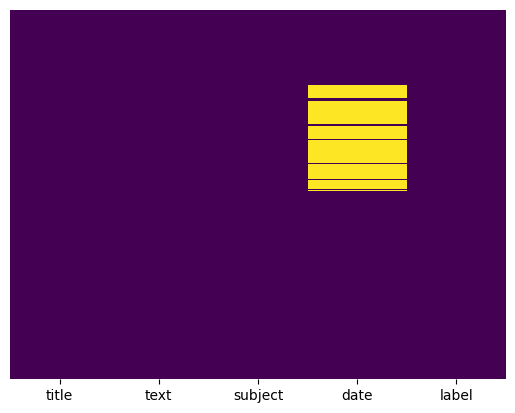

In [14]:
# heatmap: A quick way to detect missing values visually!
# Bright areas in the heatmap = Missing values (NaN).
# Dark areas = No missing values.

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

### Step: 2 Summary statistics of the dataset

In [15]:
df.describe()

,date,label
count,33079,44688.000000
mean,2017-03-09 10:40:44.983222016,0.525354
min,2015-05-01 00:00:00,0.000000
25%,2016-08-29 00:00:00,0.000000
50%,2017-04-27 00:00:00,1.000000
75%,2017-10-09 00:00:00,1.000000
max,2017-12-31 00:00:00,1.000000
std,NaN,0.499362


### Step: 3 Check data types and overall info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44688 entries, 0 to 44687
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44688 non-null  object        
 1   text     44688 non-null  object        
 2   subject  44688 non-null  object        
 3   date     33079 non-null  datetime64[ns]
 4   label    44688 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


### Step: 4 Plot class distribution

<ipython-input-17-72efcd680b4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


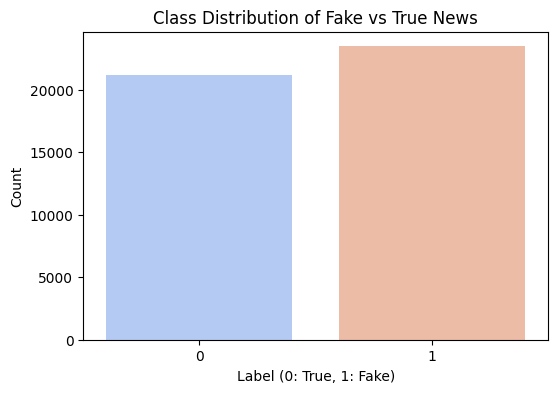

In [17]:
# a bar chart to visualize how many Fake News (0) and Real News (1).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title('Class Distribution of Fake vs True News')
plt.xlabel('Label (0: True, 1: Fake)')
plt.ylabel('Count')
plt.show()

### Step: 5 Generate WordCloud for Fake News and Real News,Plot word clouds

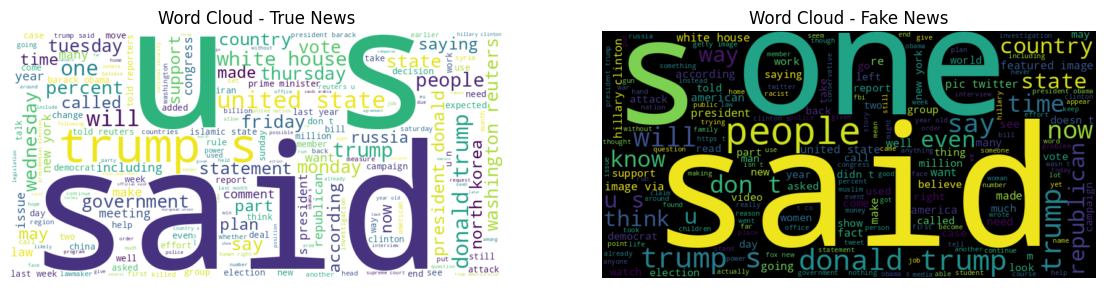

In [19]:
from wordcloud import WordCloud

fake_text = " ".join(df[df['label'] == 1]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

real_text = " ".join(df[df['label'] == 0]['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(wordcloud_real, interpolation='bilinear')
ax[0].set_title('Word Cloud - True News')
ax[0].axis('off')

ax[1].imshow(wordcloud_fake, interpolation='bilinear')
ax[1].set_title('Word Cloud - Fake News')
ax[1].axis('off')

plt.show()

## Model Development:

Building and training machine learning models (Logistic Regression) using TF-IDF (Term Frequency-Inverse Document Frequency), which converts text into numerical features by weighing important words, to detect fake news.

### Step: 1 Import Necessary Libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import RandomizedSearchCV

### Step: 2 Split Dataset into Training & Testing Sets

In [21]:
X = df['text']
y = df['label']

### Step: 3 Text Vectorization using TF-IDF

In [22]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_vectorizer.fit(X)
X = tfidf_vectorizer.transform(X)

In [23]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4792108 stored elements and shape (44688, 3000)>
  Coords	Values
  (0, 4)	0.032456519612815246
  (0, 29)	0.02545742455162848
  (0, 32)	0.11512148619354723
  (0, 48)	0.5425146926615267
  (0, 64)	0.04119907528014335
  (0, 76)	0.0388425439083354
  (0, 168)	0.03208091727999557
  (0, 179)	0.07092584862425289
  (0, 180)	0.022227476254720265
  (0, 181)	0.026209916113559516
  (0, 187)	0.04307833735981806
  (0, 191)	0.04068157917455804
  (0, 205)	0.04482050943256405
  (0, 395)	0.04138145074908167
  (0, 498)	0.05718411116431486
  (0, 539)	0.0329120731401449
  (0, 553)	0.0337299626234079
  (0, 577)	0.027490594376990155
  (0, 632)	0.026578504521191818
  (0, 661)	0.02925687950501364
  (0, 684)	0.07637247915589909
  (0, 690)	0.04113051222409289
  (0, 766)	0.457146851403636
  (0, 825)	0.020498377128143237
  (0, 829)	0.04363561417435457
  :	:
  (44687, 2073)	0.0926356413999434
  (44687, 2097)	0.12052504606303298
  (44687, 2113)	0.1144997354

### Step: 4 Split into training and testing sets (80% train, 20% test)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step: 5 Training the Model:Logistic Regression

In [25]:
model=LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

## Evaluation

In [27]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [28]:
print("accuracy score of traing data:",training_data_accuracy)

accuracy score of traing data: 0.9897902097902098


In [29]:
x_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [30]:
print("accuracy score of testing data:",testing_data_accuracy)

accuracy score of testing data: 0.9847840680241665


In [31]:
print("Classification Report for Logistic Regression:\n", classification_report(y_test, x_test_prediction))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4242
           1       0.99      0.98      0.99      4696

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [32]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, x_test_prediction))

Confusion Matrix for Logistic Regression:
[[4183   59]
 [  77 4619]]


### Prediction

In [ ]:
input_data=X_test[10]
prediction=model.predict(input_data)
if prediction[0] == 1:
    print("Fake Nwes")
else:
    print("Real News")

Real News


###Save Model and Vectorizer:

In [34]:
import pickle

# Save model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save vectorizer
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

#### Download the files

In [35]:
from google.colab import files
files.download("model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Model Deployment with Gradio

In [36]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00


###Real news:
1.Title: Republican Lawmaker Calls for Budget Restraint After Supporting Tax Bill

WASHINGTON (Reuters) – Mark Meadows, a key Republican lawmaker, called for budget restraint in 2018, despite supporting a tax bill that adds $1.5 trillion to the national debt. Speaking on CBS' Face the Nation, Meadows criticized Democrats for pushing increased government spending. However, Democrats, including Rep. Joseph Crowley, accused Republicans of hypocrisy, noting the tax bill favors corporations and the wealthy. Meanwhile, congressional debates over the federal budget, social programs, and immigration policies, including DACA, continue. President Trump plans to discuss these issues with lawmakers, alongside disaster relief funding for hurricane and wildfire-affected regions.


2.Title: Businessman Questioned Over Trump Tower Meeting

WASHINGTON (Reuters) – U.S. investigators questioned Georgian-American businessman Irakly Kaveladze about his role in a 2016 Trump Tower meeting involving Donald Trump Jr. and Russian lawyer Natalia Veselnitskaya. The meeting is under scrutiny by Congress and Special Counsel Robert Mueller as part of probes into possible Russian interference in the U.S. election. Kaveladze, linked to Russian billionaire Aras Agalarov, also attended a 2013 Las Vegas dinner with Donald Trump. Investigators are exploring whether discussions at the 2016 meeting were linked to the later release of stolen Democratic emails or U.S. sanctions on Russia. The White House and Mueller’s office declined to comment.

3.Title: Trump’s Tweets on Approval Ratings & USPS

WASHINGTON (Reuters) – U.S. President Donald Trump posted statements on his verified Twitter accounts, @realDonaldTrump and @POTUS. He claimed his approval rating on Dec. 28, 2017, was similar to President Obama’s in 2009, despite "negative coverage & Russia hoax." Trump also criticized the U.S. Postal Service, accusing it of undercharging companies like Amazon, leading to financial losses.

4.The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Yearâ€™s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR)

5.MEXICO CITY (Reuters) - Mexicoâ€™s finance ministry will evaluate whether to make fiscal changes in response to the U.S. tax reform, according to a document seen by Reuters on Friday. In the document, the ministry said Mexico would not make changes that left it with a higher public sector deficit. â€œNevertheless, there will be an assessment of whether modifications should be made to Mexicoâ€™s fiscal framework,â€ the document said.




###Fake News:
1.Title: Trump’s New Year Tweet Sparks Backlash

Donald Trump couldn't simply wish Americans a Happy New Year—he included a jab at "enemies, haters, and the fake news media." His tweet sparked criticism, with many calling it petty and unpresidential. Social media users mocked his choice of words, questioning why a president uses terms like “haters” in holiday messages. Critics argued his lack of decency and repeated habit of addressing opponents in holiday greetings reflect his divisive nature.

2.Title: Nunes Misled on Russia Investigation Origins

House Intelligence Chairman Devin Nunes wrongly assumed the Steele dossier started the Russia investigation. However, reports reveal it began after Trump aide George Papadopoulos, during a drunken conversation, disclosed knowledge of Russian dirt on Hillary Clinton to an Australian diplomat. Despite Trump’s team dismissing him as a mere "coffee boy," Papadopoulos played a key role in setting up high-level meetings. When Democratic emails leaked, Australia alerted U.S. officials, leading to an FBI probe. Papadopoulos has since pleaded guilty and is cooperating with Mueller’s team.

3.middle state of previous both

Sheriff David Clarke’s Email Scandal
Former Milwaukee Sheriff David Clarke is facing scrutiny over a January 2017 incident where he had a fellow airline passenger detained. The FBI issued a search warrant to review his emails regarding the matter. Clarke dismissed the investigation as "fake news", posting aggressive tweets attacking the media. Critics reminded the public of past controversies, including the dehydration death of an inmate in his jail.

4.Trump’s Golfing and Website Code Controversy
Donald Trump claimed he would be "back to work" after Christmas but instead played golf for four consecutive days. Critics pointed out that he had previously attacked Barack Obama for golfing but was on track to surpass Obama's first-term total.

Adding to the irony, a hidden message in Trump’s website code read:
"Unlike Obama, we are working to fix the problem – and not on the golf course."

After being exposed, the reference to Obama was quickly deleted, revealing an apparent sensitivity to Trump's golfing habits.

5.Brett Talley’s Judicial Nomination Controversy
Brett Talley, nominated by Donald Trump for a federal judgeship in Alabama, failed to disclose that he was married to a White House lawyer, Ann Donaldson, chief of staff to White House counsel Don McGahn.

This conflict of interest was missing from his Senate disclosure forms, raising ethical concerns. Additionally, Talley had never tried a case and was rated "unqualified" by the American Bar Association in a rare unanimous decision.

His nomination sparked criticism, with calls for the Senate to reject his confirmation to uphold judicial integrity.

In [37]:
import gradio as gr

# Load model and vectorizer
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)
with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Text Preprocessing (Simple Enhancement for Performance)
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\s+", " ", text).strip()  # Remove extra spaces
    return text

# Prediction function with confidence score and loading feedback
def predict_news(text):
    text = clean_text(text)
    if not text:
        return "⚠️ Please enter some text to analyze."

    transformed_input = vectorizer.transform([text])
    prediction = model.predict(transformed_input)
    confidence = np.max(model.predict_proba(transformed_input)) * 100  # Confidence Score

    label = "🟢 Real News" if prediction[0] == 0 else "🔴 Fake News"
    return f"{label} (Confidence: {confidence:.2f}%)"

# Custom Styling for an Engaging UI
css = """
body { background-color: #1a1a2e; color: #ffffff; font-family: 'Poppins', sans-serif; }
h1 { color: #ffcc00; text-align: center; font-size: 28px; }
.gr-textbox { background-color: #2c2c3e; border: 2px solid #ffcc00; color: white; padding: 12px; font-size: 16px; border-radius: 8px; }
.gr-button { background-color: #ff5722 !important; color: white !important; font-size: 18px; font-weight: bold; border-radius: 10px; padding: 12px 20px; }
.gr-container { max-width: 650px; margin: auto; padding: 25px; border-radius: 15px; background-color: #2c2c3e; box-shadow: 0px 0px 15px rgba(255, 204, 0, 0.7); }
.footer { text-align: center; font-size: 14px; margin-top: 20px; color: #aaaaaa; }
"""

# Gradio Interface with Improved UI & Friendly Text
interface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(label="📝 Enter News Text", placeholder="Paste a news article here... (e.g., 'Breaking news: AI detects fake articles!')"),
    outputs=gr.Textbox(label="🔍 Prediction Output"),
    title="📰 Fake News Detection System ",
    description="📢 **Check if a news article is real or fake in seconds!** Just paste the news text below, and our AI will determine if it's **real or fake** 🧐. Now with **confidence scores** for transparency! ✅",
    theme="dark",
    css=css,
)

interface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1115: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-67e77824-21ce279729869e0331084beb;aadbe4cd-a189-4a8d-b4ce-6b3789ff0520)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c927cd3f5ac7bcfa2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
